### Import Library

In [1]:
import numpy as np
import scipy
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import glob
import shutil

## 7.1 Effects of interpolation techniques in Image Resizing

In [2]:
# Read image file
image = cv2.cvtColor(cv2.imread("./assets/images/groupImage.jpg"), cv2.COLOR_BGR2RGB)
grid = cv2.imread("./assets/images/Grid_Image.JPG")

In [3]:
# Define resize factor
Reduce_factors = [3,6,10]# [2,4,5,7,8,10,15]


# Define interpolation method
inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]


resized = []
grid_resized = []

for factor in Reduce_factors:

    scale_resized = []
    grid_scale_resized = []

    for interpolation in inter_methods:

        dim = ( int(image.shape[0] * (1 / factor)), int(image.shape[1] * (1 / factor)))
        resized_image = cv2.resize(image, dsize=dim, interpolation= interpolation)
        scale_resized.append(resized_image)

        grid_dim = ( int(grid.shape[0] * (1 / factor)), int(grid.shape[1] * (1 / factor)))
        grid_resized_image = cv2.resize(grid, dsize=dim, interpolation= interpolation)
        grid_scale_resized.append(grid_resized_image)

    grid_resized.append(grid_scale_resized)
    resized.append(scale_resized)


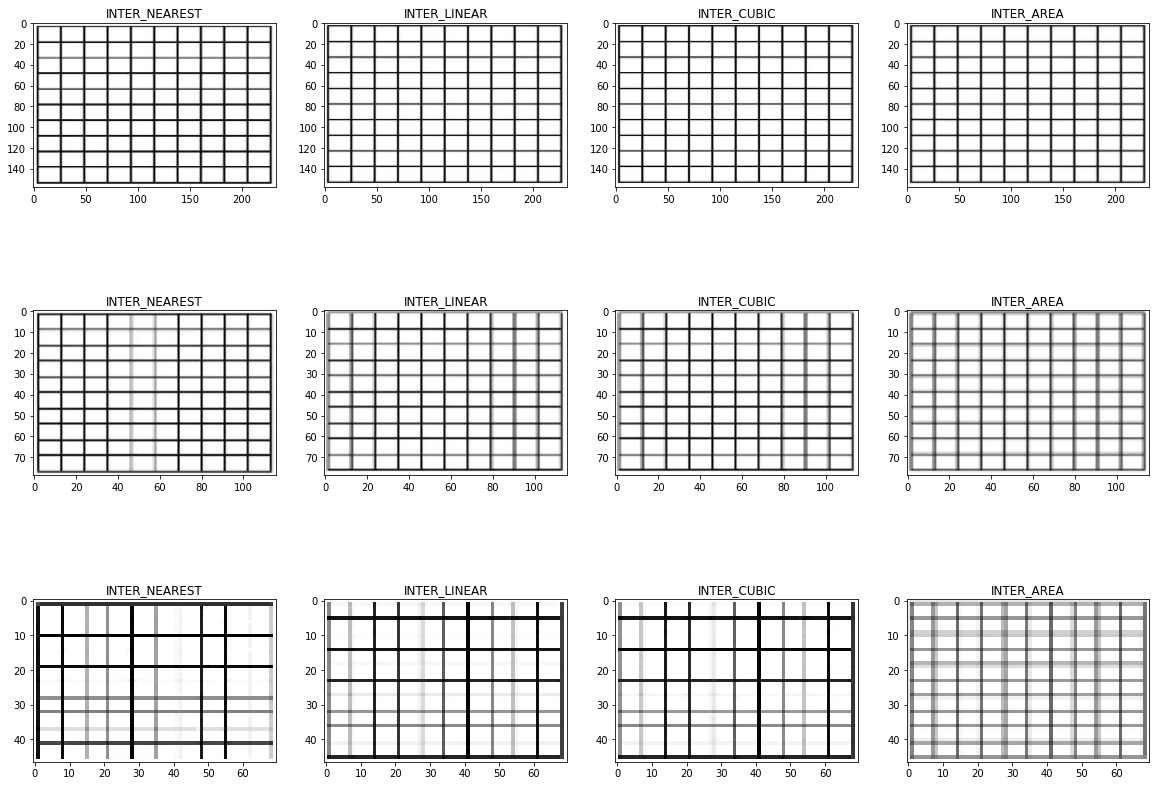

In [4]:
plt.figure(figsize=(20,15))

for i, _ in enumerate(Reduce_factors):
    
    plt.subplot(3, 4, 1 + (4 * i))
    plt.title("INTER_NEAREST")
    plt.imshow(grid_resized[i][0])

    plt.subplot(3, 4, 2 + (4 * i))
    plt.title("INTER_LINEAR")
    plt.imshow(grid_resized[i][1])

    plt.subplot(3, 4, 3 + (4 * i))
    plt.title("INTER_CUBIC")
    plt.imshow(grid_resized[i][2])

    plt.subplot(3, 4, 4 + (4 * i))
    plt.title("INTER_AREA")
    plt.imshow(grid_resized[i][3])

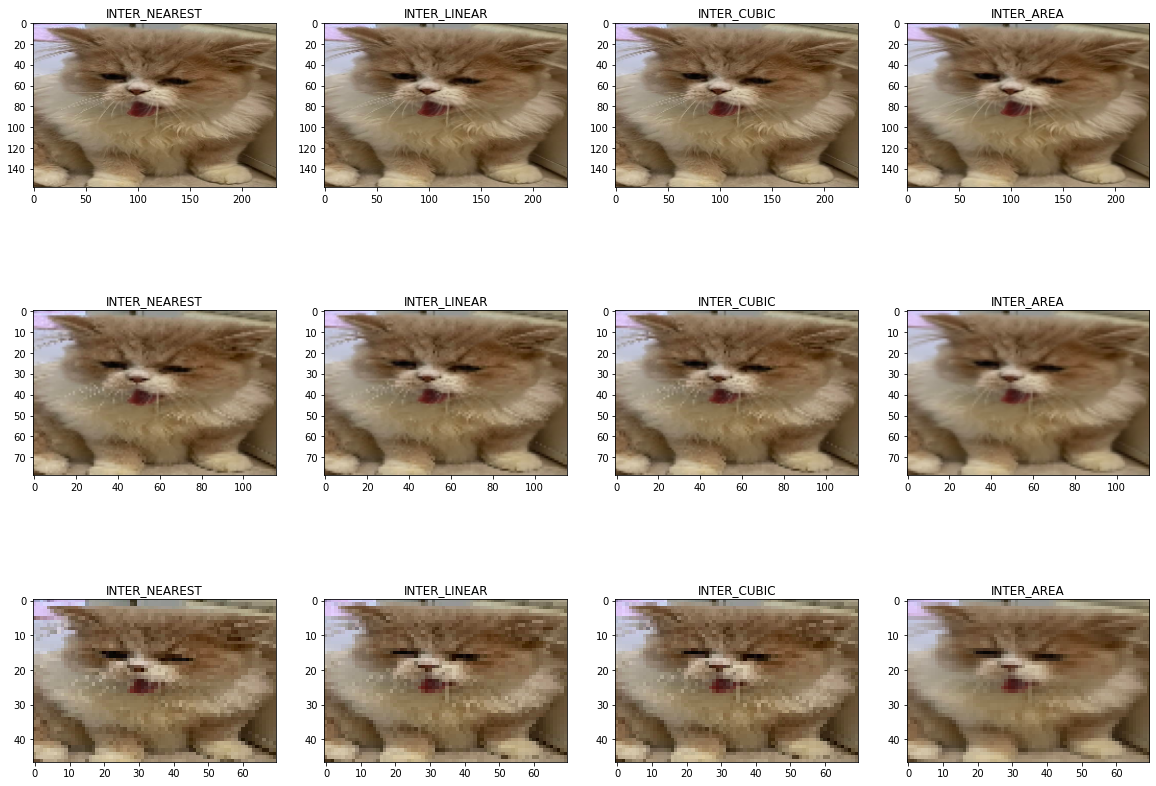

In [5]:
# Display result using each scale_factors & interpolation methods
plt.figure(figsize=(20,15))

for i, _ in enumerate(Reduce_factors):
    
    plt.subplot(3, 4, 1 + (4 * i))
    plt.title("INTER_NEAREST")
    plt.imshow(resized[i][0])

    plt.subplot(3, 4, 2 + (4 * i))
    plt.title("INTER_LINEAR")
    plt.imshow(resized[i][1])

    plt.subplot(3, 4, 3 + (4 * i))
    plt.title("INTER_CUBIC")
    plt.imshow(resized[i][2])

    plt.subplot(3, 4, 4 + (4 * i))
    plt.title("INTER_AREA")
    plt.imshow(resized[i][3])

## 7.2 Image Augmentation using KERAS ImageDataGenerator

In [6]:
# Read image file
image = cv2.resize(cv2.imread("./assets/images/groupImage.jpg"), (224,224))
image = image.reshape((1,) + image.shape)

In [7]:
# Define fill method
fill_mode = ["constant", "nearest", "reflect", "wrap"] # 

In [8]:
# Define parameters
Npic = 5
rotation_range = 45
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True

In [9]:
aug_directory = os.path.join(os.getcwd(), 'assets','augmented')
save_prefix = "aug"

In [10]:
def delete_aug(isDelete):
    if not isDelete:
        return

    
    
    if not os.path.exists(aug_directory):
        os.mkdir(aug_directory)
        return

    if len(os.listdir(aug_directory)) == 0:
        return 
    
    shutil.rmtree(aug_directory)
    os.mkdir(aug_directory)

delete_aug(True)

In [11]:
# Define VideoWriter

frame_rate = 2
video_directory = os.path.join(os.getcwd() , 'assets', 'videos')

if not os.path.exists(video_directory):
    os.mkdir(video_directory)

out_path = os.path.join(video_directory, 'ac7.mp4')

if os.path.exists(out_path):
    os.remove(out_path)

(h, w) = image.shape[1:3]
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter(out_path, fourcc, frame_rate, (w,h))

# Define ImageDataGenerator with parameters

if not os.path.exists(aug_directory):
    os.mkdir(aug_directory)

for m in fill_mode:

    datagen = ImageDataGenerator( rotation_range= rotation_range ,
                                    width_shift_range= width_shift_range,
                                    height_shift_range= height_shift_range,
                                    shear_range= shear_range,
                                    zoom_range= zoom_range,
                                    horizontal_flip= horizontal_flip,
                                    fill_mode = m)
    
    # Create our batch of one image
    pic = datagen.flow(image, batch_size= 1,save_to_dir=aug_directory, save_prefix=save_prefix,save_format='jpg')

    # Random generate transformed images and write to a video file
    for i in range(Npic):
        batch = pic.next()
        im_result = batch[0].astype('uint8')
        writer.write(im_result)

writer.release()